4.2. Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

Варинаит 23

Краевая задача $$ x(x^2 + 6)y'' - 4(x^2 + 3)y' +6xy = 0$$ $$y'(0) = 0  \\ 0  \alpha + \beta= y_a $$ $$y(4) - y'(4) = 26 \\ \delta - \gamma = y_b $$
Точное решение $$y(x) = x^3 + x^2 + 2$$

Ввразим $y''$
$$y'' = \frac{4y'(x^2 + 3)}{x(x^2 + 6)} - \frac{6y}{x^2 + 6}$$

In [1]:
import typing
import matplotlib.pyplot as plt
import math


Bad key text.latex.preview in file c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

In [2]:
def f_accurate(x:float) -> float:
    return x**3 + x**2 + 2

Оценка

In [3]:
def runge_rombert(Fh:float, Fkh:float, k:float, p:float) -> float:
    return Fh + ((Fh - Fkh) / (k**p - 1))

def mse(y_pred:list, y_valid:list) -> float:
    return math.sqrt(sum((y1 - y0) ** 2 for y1, y0 in zip(y_pred, y_valid)))

In [4]:
xa, xb = 0, 4
n = 10
h = (xb - xa) / n
alpha = 0
betta = 1
delta = 1
gamma = -1
ya = 0
yn = 26




In [5]:
def f11 (x:float, y:float, y1:float) -> float:
    return 4 * y1 * (x**2 + 3) / (x * (x**2 + 6)) - 6 * y /(x**2 + 6) 

def frange(start:float, stop:float, step:float) -> float:
    while start < stop:
        yield start
        start += step

def runge_knutta_4(x:float, x_end:float, y0:float, z0:float, f:typing.Callable[[float, float, float], float], h:float) -> (list, list):
    X = [x] + [x + h for x in frange(x, x_end, h)]
    n = len(X)
    Y = [y0] + [0 for _ in range(n-1)]
    Z = [z0] + [0 for _ in range(n-1)]
    for i, xx in enumerate(frange(x, x_end, h)):
        K1 = h * Z[i]
        L1 = h * f(xx, Y[i], Z[i])
        K2 = h * (Z[i] + L1 / 2)
        L2 = h * f(xx + h / 2, Y[i] + K1 / 2, Z[i] + L1 / 2)
        K3 = h * (Z[i] + L2/2) 
        L3 = h * f(xx + h / 2, Y[i] +  K2 / 2, Z[i] + L2 / 2)
        K4 = h * (Z[i] + L3)
        L4 = h * f(xx + h, Y[i] +  K3, Z[i] + L3)

        delta_y =  (K1 + 2* K2 + 2 * K3 + K4) / 6
        delta_z =  (L1 + 2* L2 + 2 * L3 + L4) / 6
        Y[i+1] = Y[i] + delta_y
        Z[i+1] = Z[i] + delta_z
    return Z, Y, X



Метод стрельбы

In [6]:
def get_Z(etta:float, ya:float, alpha:float, betta:float) -> float:
    return (ya - alpha * etta) / betta

def get_eta_next(etta1:float, etta2:float, delta:float, gamma:float, yn:float, res1:list, res2:list) -> (float, float):
    yb_1 = res1[0][-1]
    zb_1 = res1[1][-1]
    phi_1 = delta * yb_1 + gamma * zb_1 - yn
    yb = res2[0][-1]
    zb = res2[1][-1]
    phi_2 = delta * yb + gamma * zb - yn
    return phi_2, etta2 - (etta2 - etta1) / (phi_2 - phi_1) * phi_2

def shooting_method(a:float, b:float, h:float, alpha:float, betta:float, ya:float, delta:float, gamma:float, yn:float, etta1:float, eps=1e-4) -> (list, list, list):

    phi = eps*100
    etta2 = etta1 + eps*100
    while abs(phi) > eps:
        res1 = runge_knutta_4(a+eps, b, etta1, get_Z(etta1, ya, alpha, betta), f11, h)
        res2 = runge_knutta_4(a+eps, b, etta2, get_Z(etta2, ya, alpha, betta), f11, h)

        etta1, etta2 = etta2, get_eta_next(etta1, etta2, delta, gamma, yn, res1, res2)
        phi = etta2[0]
        etta2 = etta2[1]
    return runge_knutta_4(a+eps, b, -etta2, get_Z(-etta2, ya, alpha, betta), f11, h)

Входные данные

In [7]:
xa, xb = 0, 4
n = 20
h = (xb - xa) / n
alpha = 0
betta = 1
delta = 1
gamma = -1
ya = etta = 0
yn = 26
eps = 1e-4

In [8]:
_, shooter, X_shoot = shooting_method(xa, xb, h, alpha, betta, ya, delta, gamma, yn, etta, eps)

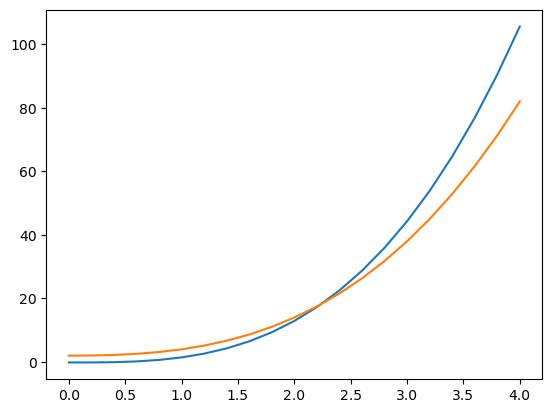

In [9]:
plt.plot(X_shoot, shooter)
plt.plot(X_shoot, [f_accurate(xx) for xx in X_shoot])
plt.show()

Оценка методов

Ошибка методом Рунге Ромберта Ричардсона

In [10]:
print('Runge Rombert Error Shooting', mse(shooter, [runge_rombert(f, ff, h / (h/10), 4) for f, ff in zip(shooter, shooting_method(xa, xb, h/10, alpha, betta, ya, delta, gamma, yn, etta, eps)[1][0::5])]))

Runge Rombert Error Shooting 0.016987586018830055


Ошибка в сравнении с точным значением

In [11]:
print('Error Shooting', mse(shooter, [f_accurate(xx) for xx in X_shoot]))

Error Shooting 38.59139747945065


Конечно разностный метод

$$ x(x^2 + 6)y'' - 4(x^2 + 3)y' +6xy = 0$$
$$y'' = \frac{4y'(x^2 + 3)}{x(x^2 + 6)} - \frac{6y}{x^2 + 6}$$

$$ y'' + p(x)y' + q(x)y = f(x)$$
$$ y'' -   \frac{4y'(x^2 + 3)}{x(x^2 + 6)} + \frac{6y}{x^2 + 6} = 0$$

$$
\begin{cases}
y_0 = y_a \\
\dots \\ 
\frac{y_{k+1} - 2y_{k} + y_{k-1}}{h^2} + p(x_k) \frac{y_{k+1} - y_{k-1}}{2h} + q(x_k) y_k = f(x_k) \\
\dots \\ 
y_n = y_b
\end{cases}\
$$

Приводя подобные и учитывая, что при задании граничных условий первого рода две неизвестные $y_0$ , $y_N$ уже фактически определены, получим СЛАУ с тридиагональной матрицей

$$
\begin{cases}
(-2 + h^2 q(x_1))y_1 + (1 + \frac{p(x_1)h}{2})y_2 = h^2 f(x_1) -   (1 - \frac{p(x_1)h}{2})y_a\\
\dots \\ 
(1 - \frac{p(x_k)h}{2})y_{k-1} + (-2 + h^2 q(x_k))y_k +  (1 + \frac{p(x_k)h}{2})y_{k+1} = h^2 f(x_k)\\
\dots \\ 
(1 - \frac{p(x_{N-1})h}{2})y_{N-1} + (-2 + h^2 q(x_{N-1}))y_{N-1} =  h^2 f(x_{N-1}) - (1 + \frac{p(x_{N-1})h}{2})y_{b} 
\end{cases}\
$$

In [12]:
def p_func(x:float) -> float:
    return -4 * (x**2 + 3) / (x * (x**2 + 6))

def q_func(x:float) -> float:
    return 6 / (x**2 + 6)

def f(x:float) -> float:
    return 0


def inner_left(x:float, h:float) -> float:
    return (1 - p_func(x) * h / 2)

def inner_mid(x:float, h:float) -> float:
    return (-2 + h**2 * q_func(x))

def inner_right(x:float, h:float) -> float:
    return (1 + p_func(x) * h / 2)

def eq_sign_f(x:float, h:float) -> float:
    return f(x) * h ** 2



def solve_PQ(A0:list, A1:list, A2:list, B:list) -> list:
    P = [-A2[0] / A1[0]]
    Q = [B[0] / A1[0]]
    for i in range(1, len(B)):
        P.append(-A2[i] / (A1[i] + A0[i] * P[i - 1]))
        Q.append((B[i] - A0[i] * Q[i - 1]) / (A1[i] + A0[i] * P[i - 1]))

    res = [Q[-1]]

    for i in range(len(B) - 2, -1, -1):
        res.append(P[i] * res[-1] + Q[i])

    return res[::-1]

def finite_difference (xa:float, xb:float, h:float, ya:float, yb:float, alpha:float, betta:float, gamma:float, delta:float) -> (list, list):
    X = [round(x, 6) for x in frange(xa, xb+h, h)]
    A0 = [0] + [inner_left(x, h) for x in X[1:-1]] + [-gamma]
    A1 = [h * alpha - betta] + [inner_mid(x, h) for x in X[1:-1]] + [h * delta + gamma] 
    A2 = [betta] + [inner_right(x, h) for x in X[1:-1]] + [0]
    B = [ya * h] + [eq_sign_f(x, h) for x in X[1:-1]] + [yb * h]
    return X, solve_PQ(A0, A1, A2, B)

Входные данные

In [13]:
xa, xb = 0, 4
n = 20
h = (xb - xa) / n
alpha = 0
betta = 1
delta = 1
gamma = -1
ya = 0
yb = 26

Результат

In [14]:
X, res_finite = finite_difference(xa, xb, h, ya, yb, alpha, betta, gamma, delta)

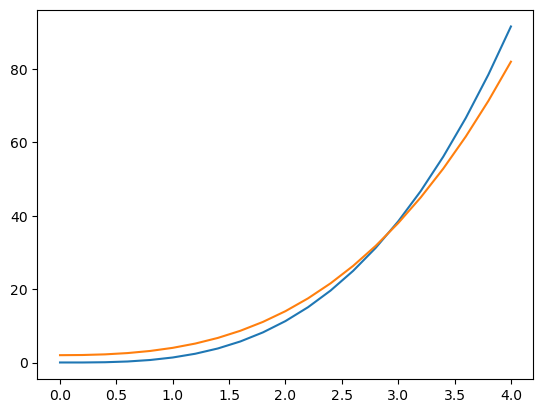

In [15]:
plt.plot(X, res_finite)
plt.plot(X, [f_accurate(xx) for xx in X])
plt.show()

Ошибка методом Рунге Ромберта Ричардсона

In [16]:
print('Runge Rombert Error Finite difference', mse(res_finite, [runge_rombert(f, ff, h / (h/10), 4) for f, ff in zip(res_finite, finite_difference(xa, xb, h/10, ya, yb, alpha, betta, gamma, delta)[1][0::5])]))

Runge Rombert Error Finite difference 0.014460215242703222


Ошибка в сравнении с точным значением

In [17]:
print('Error Finite difference', mse(res_finite, [f_accurate(xx) for xx in X]))

Error Finite difference 16.300271391037754
